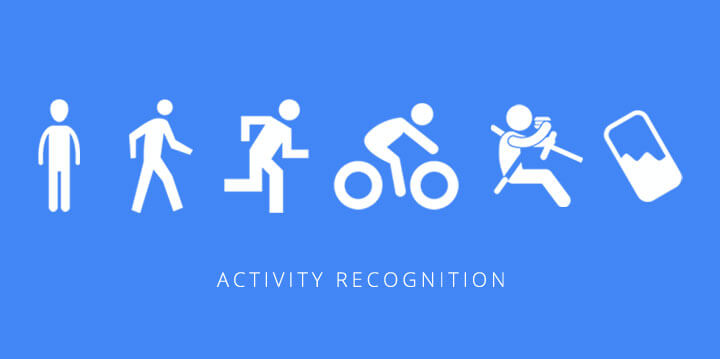

In [1]:
from IPython.core.display import Image, display
display(Image('https://www.androidhive.info/wp-content/uploads/2017/12/android-user-activity-recognition-still-walking-running-driving.jpg', width=600))

In [2]:
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
from sklearn import metrics

## Analyse avec dataset brut

In [3]:
# récupération de variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET BRUT)
%store -r activity_dataset_full
%store -r colonnes_source
%store -r colonnes_cible
%store -r source
%store -r cible

In [4]:
# afficher dataset
activity_dataset_full.head(None)

,Action,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
0,Se lever (chaise),0.635193,0.562164,0.283249,0.328735,0.045013,-1.713516,-2.079834,-0.962936,-2.556274,...,8.747101,9.652100,9.859192,10.802505,13.584579,12.082214,14.362686,0,0,1
1,S'assoir (chaise),-0.049545,0.103683,0.085724,-0.032791,0.163528,0.037842,0.217407,0.337112,0.559769,...,15.057007,14.237000,14.550629,14.302826,17.004684,14.766113,14.721832,0,0,1
2,Se lever (chaise),0.297607,-0.080673,0.219788,0.309570,0.875809,1.343872,1.078110,1.118820,0.959610,...,12.562241,13.444504,14.579376,14.591339,13.250595,13.529510,13.901810,0,0,1
3,S'assoir (chaise),0.073746,-0.011246,-0.050751,0.015091,-0.114197,0.004318,-0.012436,-0.044769,0.356262,...,14.497955,14.603302,13.281708,13.818008,13.615707,12.161224,12.683167,0,0,1
4,S'assoir (chaise),-0.215942,-0.227921,0.054596,0.242538,-0.502060,-0.815704,0.562164,-0.844421,-0.509247,...,11.858353,11.490845,12.709488,11.627335,16.178680,15.608887,13.404999,0,0,1
5,Se lever (chaise),0.656738,0.335907,0.605255,0.568146,0.474777,0.628006,0.953613,1.128387,1.390564,...,10.050735,10.024414,11.799683,12.848358,14.452469,14.219040,13.470856,0,0,1
6,S'assoir (chaise),0.250916,0.150360,0.199448,0.224579,0.292816,0.116852,0.067764,-0.024414,-0.112991,...,17.112427,15.128830,13.330780,14.136429,14.870270,12.547897,12.288101,0,0,1
7,Se lever (chaise),0.563370,0.684265,0.241348,0.832718,0.422104,0.766876,0.699829,0.875809,0.960800,...,11.926590,8.392746,8.573502,10.373947,13.592957,14.381851,14.163971,0,0,1
8,S'assoir (chaise),0.446045,0.211411,0.108459,-0.189621,-0.077087,0.341904,-0.041168,-0.728302,-0.229111,...,12.910599,10.436203,12.107361,13.580978,14.277695,14.428528,13.863510,0,0,1
9,Se lever (chaise),1.092484,-0.044769,0.268875,0.119232,-0.099838,-0.332062,0.110855,0.428085,0.504700,...,14.002365,14.732605,14.667953,13.225449,14.119690,14.590134,14.975616,0,0,1


In [5]:
# afficher les nombres d'exemple dans chaque classe 
count = Counter(activity_dataset_full.Action)
count

Counter({'Courrir': 60,
         'Marcher': 57,
         'Ne rien faire': 57,
         "S'allonger (depuis position assise)": 59,
         "S'allonger (depuis position debout)": 56,
         "S'assoir (chaise)": 52,
         "S'assoir (depuis position allongée)": 66,
         'Sauter': 56,
         'Se lever (chaise)': 51,
         'Se lever (depuis position allongée)': 51})

### Split data

In [6]:

x_train, x_test, y_train, y_test = train_test_split(source, cible, test_size=0.7)

display(x_train, y_train, x_test, y_test)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z14,z15,z16,z17,z18,z19,z20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
86,-0.071106,-0.084274,-0.055542,-0.098633,-0.087860,-0.098633,-0.086670,-0.108215,-0.093842,-0.105820,...,4.341248,4.264633,4.342453,4.360397,4.308929,4.289780,4.363998,0,0,1
262,1.597656,0.854263,1.187057,1.231339,1.157120,1.444427,1.693420,2.435623,2.815109,6.303467,...,-1.599960,-3.037674,7.820023,5.385117,16.153046,9.759323,4.963745,0,0,1
88,-0.223129,-0.014832,-0.176453,-0.114197,-0.092651,-0.104614,-0.085464,-0.123779,-0.115387,-0.107010,...,9.091354,9.109299,9.066208,9.090149,9.084167,9.094940,9.078186,0,0,1
249,-0.688797,-0.461349,-1.161667,0.319153,-1.006042,-1.849991,-0.994064,-7.772049,-1.138916,-5.377853,...,8.388657,18.720825,8.619690,6.943741,7.003601,6.363159,5.628128,0,0,1
256,-1.264603,-1.102997,-0.770203,-0.007660,-0.663666,-0.158493,0.006714,-0.279388,-2.472488,-0.820480,...,0.490173,8.406601,9.535477,12.616806,16.046509,6.436172,9.803619,0,0,1
432,0.396973,-0.059128,-0.324890,0.302399,0.379013,1.330704,-0.615784,-1.340027,-0.217148,-0.613388,...,3.545181,5.075073,4.782974,7.040710,6.827637,7.390274,6.668411,0,0,1
329,0.809967,1.386963,1.185852,1.105652,1.001495,1.493515,1.291199,1.422882,1.117615,1.402527,...,3.196823,3.044785,3.130981,2.931061,2.990921,3.699600,3.427856,0,0,1
204,0.654343,0.959610,0.485550,0.340698,0.141983,-0.206375,1.482742,0.364639,-0.723526,-0.287781,...,4.879944,5.245056,3.879166,4.822479,5.199570,4.741089,6.072266,0,0,1
443,-9.756836,-9.894516,-9.596436,-9.644318,-9.396515,-13.212875,-12.056473,-12.222870,-12.327026,-9.829865,...,-1.075638,-0.898453,0.364487,2.009293,1.514893,1.395187,1.858459,0,0,1
282,-0.334457,-0.687607,-0.834854,1.272049,0.070160,2.980316,3.153885,0.595688,1.439636,-1.900269,...,10.784042,10.764893,8.276123,4.604614,2.637772,1.044434,-5.599472,0,0,1


,Action
86,Ne rien faire
262,Sauter
88,Ne rien faire
249,Sauter
256,Sauter
432,S'assoir (depuis position allongée)
329,Ne rien faire
204,S'assoir (chaise)
443,S'assoir (depuis position allongée)
282,S'allonger (depuis position debout)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z14,z15,z16,z17,z18,z19,z20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
84,-0.060333,-0.086670,-0.095047,-0.044769,-0.074692,-0.110611,-0.102219,-0.063919,-0.083069,-0.126160,...,4.353226,4.207169,4.347229,4.262238,4.324493,4.259842,4.329285,0,0,1
528,4.222900,6.473450,7.469437,7.258743,14.580215,30.217941,13.117355,-11.800293,20.655502,38.461182,...,-9.807281,7.542297,4.301743,-5.965790,30.750488,2.348083,4.141342,0,0,1
44,12.351212,13.101791,12.048355,11.333679,7.107910,5.901230,5.380493,1.744904,0.624420,-1.644089,...,5.097824,5.705948,6.807281,5.539551,6.302109,5.412659,5.693970,0,0,1
522,-0.942596,-1.223907,-1.287354,-1.272995,-1.142502,-1.197571,-1.262222,-1.286163,-1.274185,-1.306503,...,8.569412,8.485611,8.398224,8.620880,8.732224,8.665176,8.774109,0,0,1
481,-0.145325,-0.533188,-0.251862,-0.023224,1.214584,1.659912,1.767639,2.725327,3.146713,5.404434,...,-2.939514,-1.477859,1.451447,1.620239,1.128235,1.008530,2.579117,0,0,1
4,-0.215942,-0.227921,0.054596,0.242538,-0.502060,-0.815704,0.562164,-0.844421,-0.509247,-0.293762,...,4.832062,2.870010,5.031982,3.272247,6.510391,7.116135,5.164856,0,0,1
437,-9.687408,-9.497070,-9.554535,-12.163010,-12.456299,-10.985062,-12.981827,-11.423203,-9.477921,-8.581284,...,2.411530,0.907959,0.605103,2.860443,4.622574,3.529617,3.795380,0,0,1
534,0.574142,-0.035187,0.112061,-0.042374,0.153961,0.296402,-0.263840,-2.206726,-4.367493,-2.508392,...,-5.545609,-10.175995,-3.485397,-2.314636,1.305405,1.480179,-0.217316,0,0,1
442,9.436279,9.687668,10.760269,13.227493,15.515152,9.348892,5.261978,3.827850,2.684631,1.858627,...,7.705109,6.163239,5.467728,4.059937,2.739532,3.978531,3.379974,0,0,1
464,2.035797,2.149521,2.215363,2.023819,2.197403,2.433228,1.950806,2.262054,1.784409,1.603638,...,9.753342,9.728210,9.664764,10.831924,8.483215,9.727005,9.274506,0,0,1


,Action
84,Ne rien faire
528,Courrir
44,S'assoir (depuis position allongée)
522,Ne rien faire
481,S'allonger (depuis position assise)
4,S'assoir (chaise)
437,S'assoir (depuis position allongée)
534,S'allonger (depuis position debout)
442,S'assoir (depuis position allongée)
464,Ne rien faire


In [7]:
# DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_train, y_train)

predict = clf.predict(x_test)


### Report

In [8]:
print(metrics.classification_report(y_test,predict))

                                     precision    recall  f1-score   support

                            Courrir       0.51      0.44      0.47        41
                            Marcher       0.77      0.71      0.74        48
                      Ne rien faire       0.47      0.83      0.60        41
S'allonger (depuis position assise)       0.84      0.84      0.84        44
S'allonger (depuis position debout)       0.57      0.62      0.59        39
                  S'assoir (chaise)       0.35      0.22      0.27        36
S'assoir (depuis position allongée)       0.53      0.70      0.60        44
                             Sauter       0.81      0.38      0.52        34
                  Se lever (chaise)       0.30      0.21      0.25        38
Se lever (depuis position allongée)       0.65      0.71      0.68        31

                        avg / total       0.58      0.58      0.57       396



### Accuracy

In [9]:
res=[]

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(source, cible, test_size=.4)
    clf = DecisionTreeClassifier().fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    res.append(accuracy_score(y_test, y_predict))
    
print('Average : ',np.average(res))

Average :  0.659292035398


### Graphe

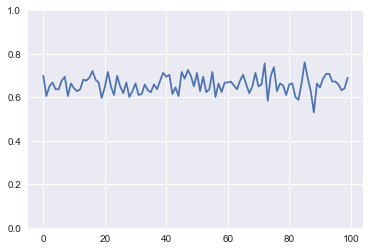

In [10]:
%matplotlib inline

plt.ylim([0,1])
plt.plot(res);

### Decision tree image

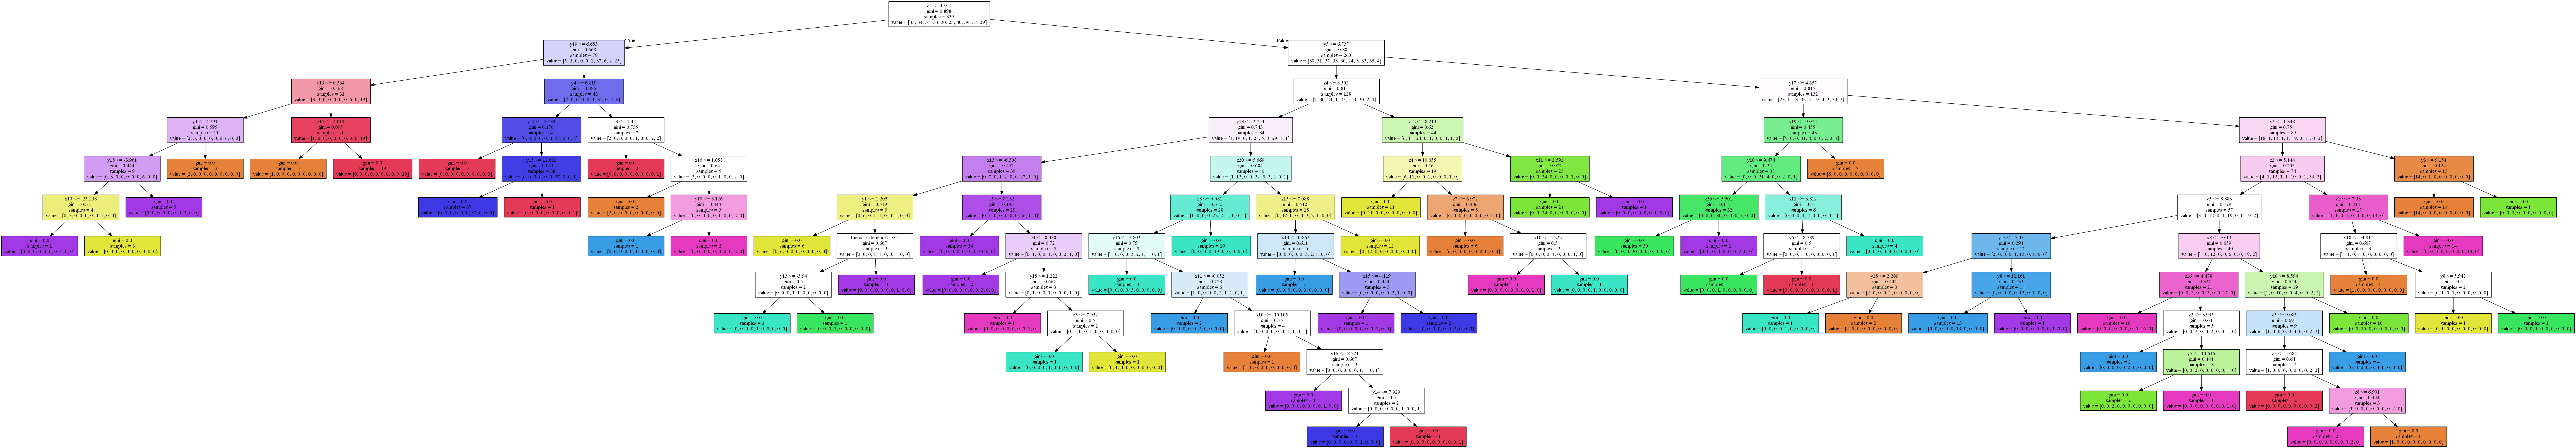

In [11]:
# Install Graphviz + set system path to dot
# pip install export_graphviz

with open("tree.dot", 'w') as f:
        export_graphviz(clf, out_file=f,
                        feature_names=source.columns,
                        filled=True)
        
!dot -Tpng tree.dot -o tree.png 
display(Image('tree.png'))



## Analyse avec dataset analysé

In [12]:
# récupération des variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET ANALYSE)
%store -r activity_dataset_analysed
%store -r colonnes_source_analysed
%store -r colonnes_cible_analysed
%store -r source_analysed
%store -r cible_analysed

In [13]:
x_analysed_train, x_analysed_test, y_analysed_train, y_analysed_test = train_test_split(source_analysed, cible_analysed, test_size=0.7)

display(x_analysed_train, y_analysed_train, x_analysed_test, y_analysed_test)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
34,9.828918,9.761887,10.452606,10.787796,10.932648,12.669647,11.236710,12.498459,8.372055,6.325012,...,16.217682,16.217682,-1.249054,-4.125427,-4.334137,-4.334137,4.907182,4.751521,5.697657,5.196257
320,-0.150116,0.821930,1.032623,1.030228,1.713776,1.461182,2.062134,1.598862,8.652176,4.972290,...,11.365845,14.033401,-5.437698,3.061966,1.632217,-5.437698,3.074004,2.696062,2.364666,3.642553
474,0.574142,-0.035187,0.112061,-0.042374,0.153961,0.296402,-0.263840,-2.206726,-4.367493,-2.508392,...,10.791229,11.398575,-13.606720,-3.325760,-10.175995,-13.606720,5.237061,4.324645,5.586738,6.244059
260,0.733353,0.435272,0.513092,-0.557129,1.205002,1.375000,1.550964,3.017426,3.378937,-1.375946,...,18.564011,18.564011,-1.375946,-0.724457,-2.417587,-2.417587,1.609211,2.309089,4.930558,4.519360
182,-0.358398,0.094101,0.177902,-0.195602,0.304794,-1.191589,-0.158493,-0.454178,0.151566,0.770462,...,8.753769,9.873474,-1.191589,7.164429,1.354477,-1.191589,0.532210,0.805478,1.732335,3.658982
486,1.033829,0.651947,0.845886,1.467178,1.908905,2.613998,2.195007,1.109238,-1.915833,-2.966888,...,4.283783,9.951279,-15.051620,-1.816223,-7.328094,-15.051620,5.828719,4.041247,3.074275,5.969203
130,0.528641,-0.297348,-0.735489,-1.571060,-1.063492,-2.082230,-1.336441,-2.189972,-2.841187,-3.309265,...,13.279999,13.279999,-3.596558,2.367645,5.980087,-3.596558,1.447688,1.281660,2.406855,4.350036
509,0.760880,0.370636,-0.037582,-0.585861,-1.251434,-4.567413,-2.241440,-9.792755,-3.193146,-1.018005,...,38.419128,38.419128,-9.792755,-5.866013,-7.141342,-9.792755,2.537123,9.219610,9.643705,8.932264
309,0.971573,2.446396,2.313522,0.656738,5.578018,-0.060333,9.482956,0.948822,1.770035,6.174179,...,14.497452,14.497452,-4.131668,-2.891220,-2.308640,-4.131668,3.410239,3.069678,3.775467,3.894712
41,11.771820,10.372406,10.368820,10.051590,10.071930,11.327698,7.948273,6.811035,5.351761,2.016647,...,6.585815,11.771820,-1.688385,0.615097,-1.122314,-1.688385,5.279331,2.985711,2.301406,3.775395


,Action
34,Se lever (depuis position allongée)
320,Courrir
474,S'allonger (depuis position debout)
260,Sauter
182,S'assoir (chaise)
486,S'allonger (depuis position assise)
130,S'assoir (chaise)
509,Sauter
309,Courrir
41,S'assoir (depuis position allongée)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
551,-9.348633,-9.645508,-9.644318,-9.500671,-9.849014,-13.355331,-10.101608,-10.048935,-12.505386,-10.212936,...,5.122955,10.023102,-13.355331,-2.247177,-1.783112,-13.355331,4.736542,4.506815,1.565553,5.795734
390,-9.418060,-10.822266,-10.045349,-8.900909,-8.866196,-10.240479,-11.527359,-10.915634,-11.366943,-8.025833,...,10.620041,10.620041,-11.527359,-1.179367,-4.233582,-11.527359,4.729126,2.896256,4.654186,6.010870
189,-0.401505,-0.482910,-0.590637,-0.418259,-0.873154,-1.244263,0.035446,0.660324,0.675888,0.106064,...,6.504410,9.866287,-1.244263,7.205139,1.877625,-1.244263,0.814430,0.718340,1.464026,3.895683
133,0.859055,1.003891,0.671097,1.057770,-7.787613,-34.102280,-26.100861,-17.696014,-39.862732,-39.856750,...,25.067856,36.303070,-39.862732,-38.746780,-10.414215,-39.862732,17.997028,18.145577,8.578589,17.066964
279,-1.337631,-1.148499,-1.198776,-0.885132,-0.870758,-0.640915,-3.409821,-1.632126,0.774048,0.072556,...,13.789963,13.789963,-6.956818,-0.944733,5.859177,-6.956818,1.867853,1.974355,1.851963,4.754912
160,-3.096176,-3.079422,-1.128143,0.016281,-0.609802,-0.500854,-0.950974,-0.274612,-1.838028,-1.969696,...,16.129105,16.129105,-4.864288,1.268707,4.822479,-4.864288,1.211926,1.193492,2.664037,4.753370
515,0.405350,0.089310,-1.964920,-2.130112,-0.284180,0.122833,0.823135,0.811157,0.696243,0.267685,...,13.485901,13.485901,-3.548676,3.053589,6.012405,-3.548676,1.247668,0.896373,1.743717,4.087621
80,1.281616,-0.600220,-1.894287,-0.761826,-0.658875,0.624420,0.212616,0.574142,0.028259,-1.075470,...,14.164658,14.164658,-2.182785,2.183289,7.324432,-2.182785,0.851163,0.772980,1.813737,4.126680
24,0.600479,0.062973,-0.136948,-1.046738,-1.454956,-0.774994,-1.341217,-1.536346,1.549774,3.996643,...,6.300903,16.438370,-1.536346,-5.736725,-2.175766,-5.736725,5.302261,6.155327,2.718745,4.961038
267,1.833481,1.194229,2.029816,1.464783,2.405701,3.637512,1.612030,1.966370,-0.727112,1.052979,...,10.963608,11.512299,-7.391373,2.706421,-3.806213,-7.391373,2.419819,2.267515,4.131705,4.270347


,Action
551,S'assoir (depuis position allongée)
390,Se lever (depuis position allongée)
189,S'assoir (chaise)
133,Sauter
279,S'allonger (depuis position debout)
160,Marcher
515,Marcher
80,Marcher
24,S'allonger (depuis position debout)
267,S'allonger (depuis position debout)


In [14]:
# DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_analysed_train, y_analysed_train)

predict = clf.predict(x_analysed_test)

### Report

In [15]:
print(metrics.classification_report(y_analysed_test,predict))

                                     precision    recall  f1-score   support

                            Courrir       0.60      0.68      0.64        41
                            Marcher       0.62      0.67      0.64        42
                      Ne rien faire       0.97      0.81      0.89        43
S'allonger (depuis position assise)       0.89      0.91      0.90        44
S'allonger (depuis position debout)       0.50      0.49      0.49        37
                  S'assoir (chaise)       0.57      0.54      0.56        37
S'assoir (depuis position allongée)       0.58      0.78      0.67        36
                             Sauter       0.54      0.50      0.52        40
                  Se lever (chaise)       0.46      0.42      0.44        38
Se lever (depuis position allongée)       0.75      0.63      0.69        38

                        avg / total       0.66      0.65      0.65       396



### Accuracy

In [16]:
res=[]

for i in range(100):
    x_analysed_train, x_analysed_test, y_analysed_train, y_analysed_test = train_test_split(source_analysed, cible_analysed, test_size=.4)
    clf = DecisionTreeClassifier().fit(x_analysed_train, y_analysed_train)
    y_predict = clf.predict(x_analysed_test)
    res.append(accuracy_score(y_analysed_test, y_predict))

print('Average : ',np.average(res))

Average :  0.765221238938


### Graphe

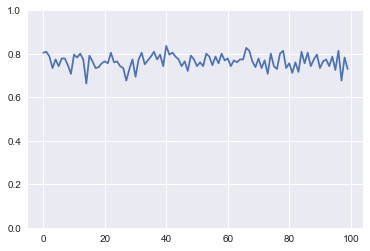

In [17]:
%matplotlib inline

plt.ylim([0,1])
plt.plot(res);